In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [47]:
P = np.poly1d([1,1])
print(P)

 
1 x + 1


 
1 x + 1


---

# Lagrange polynomials

In [24]:
X = np.arange(5)

#calculate the Lagrange polys
L = []
for i,x in enumerate(X):
    P = np.poly1d([1])
    for k, x1 in enumerate(X):
        if i == k : continue
        P *= np.poly1d([1, - x1 ])/( x - x1)
    L.append(P)

# Fit to function

In [25]:
f = np.cos
fit = sum([ y*p for y, p  in zip(f(X),L)])
# you really do need this as fit is only a np.array
fit = np.poly1d(fit)

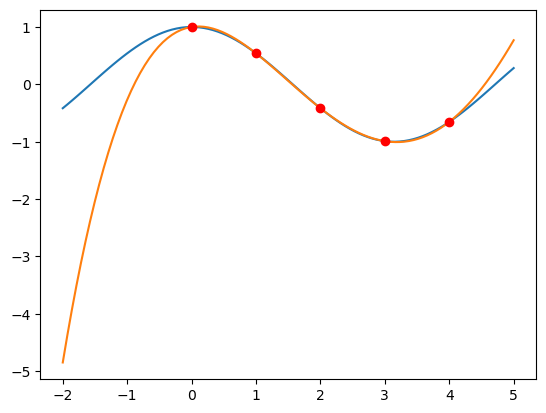

In [27]:
T = np.linspace(-2,5,100)
plt.plot(T, f(T))
plt.plot(T, fit(T));
plt.plot(X, f(X),'ro');

---

# Newton’s Polynomial Interpolation

Then I got tired and I got the code from 
[here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html)

In [16]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x[i+j] - x[i])
            
    return coef


def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial at x
    '''
    n = len(x_data) - 1 
    #then it's like horner
    val = coef[n]
    for k in range(1, n+1):
        val = coef[n-k] + (x - x_data[n-k])*val
    return val

In [29]:
# I think I coped and pasted from the pdf

X, Y = list(zip(* [(1, 3), (2, 2), (4, 1), (5, 4)]))

divided_diff(X,Y)

array([[ 3.        , -1.        ,  0.16666667,  0.25      ],
       [ 2.        , -0.5       ,  1.16666667,  0.        ],
       [ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 4.        ,  0.        ,  0.        ,  0.        ]])

(4,)


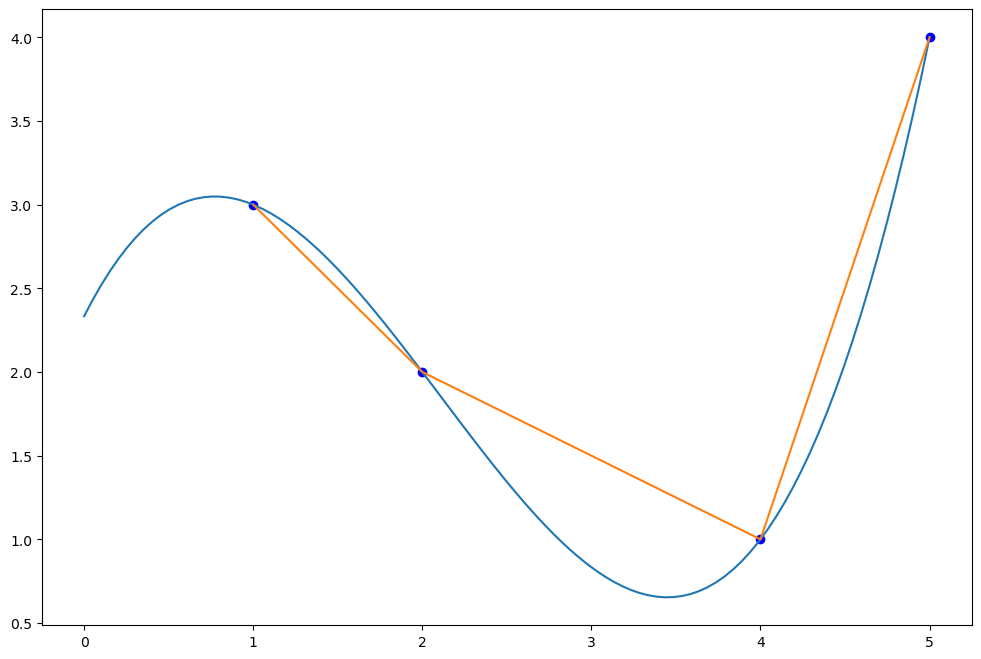

In [30]:

# get the divided difference coef
a_s = divided_diff(X, Y)[0, :]
print(a_s.shape)
# evaluate on new data points
x_new = np.linspace(0,5,100)
y_new = newton_poly(a_s, X, x_new)


plt.figure(figsize = (12, 8))
plt.plot(X, Y, 'bo')
plt.plot(x_new, y_new)
plt.plot(X,Y);

---

# Runge

[compare with this](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

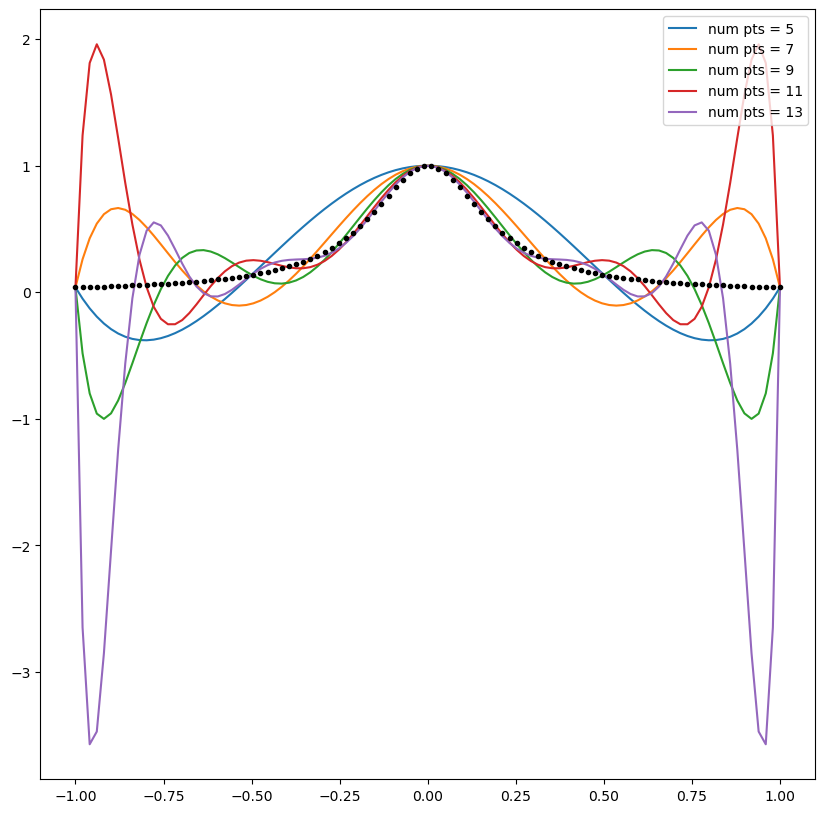

In [42]:
fig, ax  = plt.subplots(1, figsize=(10, 10))

#ax.set_aspect('equal')

x_ref = np.linspace(-1,1,100)

for N in range(5,15,2):
    
    X = np.linspace(-1,1,N)
    Y = 1/(1 + 25*X**2)
    a_s = divided_diff(X, Y)[0, :] 
    
    # display the graph 
    ax.plot(x_ref, newton_poly(a_s, X, x_ref), label=f'num pts = {N}')
    
ax.legend(loc='upper right')
    
X = x_ref
Y = 1/(1 + 25*X**2)
ax.plot(X, Y,'k.');

---

# Chebyshev polynomials


The Chebyshev polynomials of the first kind are obtained from the recurrence relation

$ \begin{aligned}T_{0}(x)&=1\\T_{1}(x)&=x\\T_{n+1}(x)&=2x\,T_{n}(x)-T_{n-1}(x).\end{aligned}$

In [50]:
TCH = [np.poly1d([1]), np.poly1d([1,0]) ]

In [51]:
for k in range(10):
    TCH.append( np.poly1d([2,0])* TCH[-1] - TCH[-2])

In [52]:
TCH

[poly1d([1]),
 poly1d([1, 0]),
 poly1d([ 2,  0, -1]),
 poly1d([ 4,  0, -3,  0]),
 poly1d([ 8,  0, -8,  0,  1]),
 poly1d([ 16,   0, -20,   0,   5,   0]),
 poly1d([ 32,   0, -48,   0,  18,   0,  -1]),
 poly1d([  64,    0, -112,    0,   56,    0,   -7,    0]),
 poly1d([ 128,    0, -256,    0,  160,    0,  -32,    0,    1]),
 poly1d([ 256,    0, -576,    0,  432,    0, -120,    0,    9,    0]),
 poly1d([  512,     0, -1280,     0,  1120,     0,  -400,     0,    50,
            0,    -1]),
 poly1d([ 1024,     0, -2816,     0,  2816,     0, -1232,     0,   220,
            0,   -11,     0])]

### Check here:


https://en.wikipedia.org/wiki/Chebyshev_polynomials#First_kind

---

# Chebyshev nodes


https://math.stackexchange.com/questions/803915/how-to-find-chebyshev-nodes

For a given positive integer n the Chebyshev nodes in the interval (−1, 1) are

$x_{k}=\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\ldots ,n.$

- These are the roots of the Chebyshev polynomial of the first kind of degree n. 
- For nodes over an arbitrary interval [a, b] an affine transformation can be used:

$ x_{k}={\frac {1}{2}}(a+b)+{\frac {1}{2}}(b-a)\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\ldots ,n.$

In [76]:
n = 40
T = np.pi * np.linspace(.5/n, 1 - .5/n, n)
TCH[5](np.cos(T))

array([ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
       -0.55557023, -0.83146961, -0.98078528, -0.98078528, -0.83146961,
       -0.55557023, -0.19509032,  0.19509032,  0.55557023,  0.83146961,
        0.98078528,  0.98078528,  0.83146961,  0.55557023,  0.19509032,
       -0.19509032, -0.55557023, -0.83146961, -0.98078528, -0.98078528,
       -0.83146961, -0.55557023, -0.19509032,  0.19509032,  0.55557023,
        0.83146961,  0.98078528,  0.98078528,  0.83146961,  0.55557023,
        0.19509032, -0.19509032, -0.55557023, -0.83146961, -0.98078528])

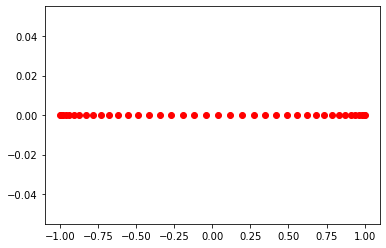

In [77]:
plt.plot(np.cos(T), 0*T, 'ro') 

In [54]:
def chebyshev_nodes(a, b, n):
    # n Chebyshev nodes for [a,b]
    T = np.arange(1,n+1)
    X = np.cos((T - 0.5)/n * np.pi) # nodes over interval [-1,1]
    return 0.5*(b-a)*X + 0.5*(b+a) # nodes over interval [a,b]

In [56]:
X = chebyshev_nodes(-1,1,5)
TCH[5](X)

array([-8.44707874e-16,  0.00000000e+00,  3.06161700e-16, -5.22058177e-16,
        8.44707874e-16])

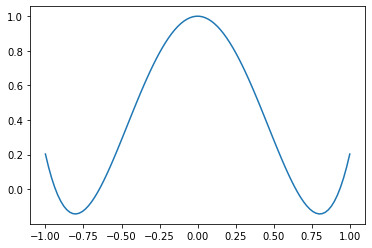

In [126]:

X = chebyshev_nodes(-1,1,5)
Y = 1/(1 + 25*X**2)
#ax.plot(X,Y,'b.')
a_s = divided_diff(X, Y)[0, :]
x_new = np.linspace(-1,1,100)
y_new = newton_poly(a_s, X, x_new)
plt.plot(x_new,y_new);

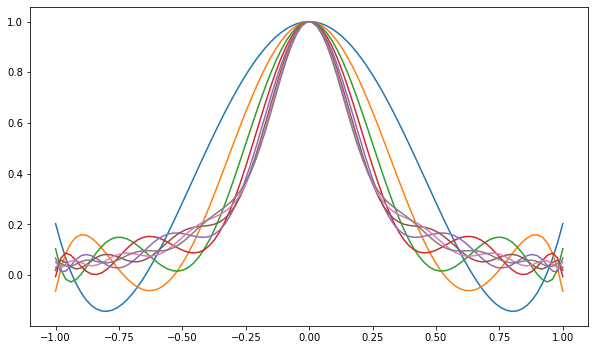

In [128]:
fig, ax  = plt.subplots(1, figsize=(10, 10))
ax.set_aspect('equal')

x_new = np.linspace(-1,1,100)

for N in range(5,20,2):
    X = chebyshev_nodes(-1,1,N)
    Y = 1/(1 + 25*X**2)
    #ax.plot(X,Y,'b.')
    a_s = divided_diff(X, Y)[0, :]
    y_new = newton_poly(a_s, X, x_new)
    ax.plot(x_new,y_new)

---

# Linear regression

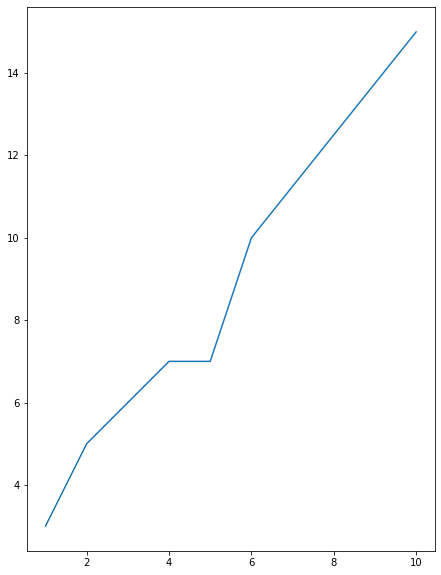

In [21]:
pts = [(1, 3), (2, 5), (3, 6), (4, 7), (5, 7), (6, 10), (10, 15)]

X, Y = list(zip(*pts))
X = np.array(X)

fig, ax  = plt.subplots(1, figsize=(10, 10))
ax.set_aspect('equal')
ax.plot(X,Y);

In [11]:
np.polyfit(X,Y,1)

array([1.28989362, 1.85904255])

? np.polyfit

Signature:  np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.
   
   Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

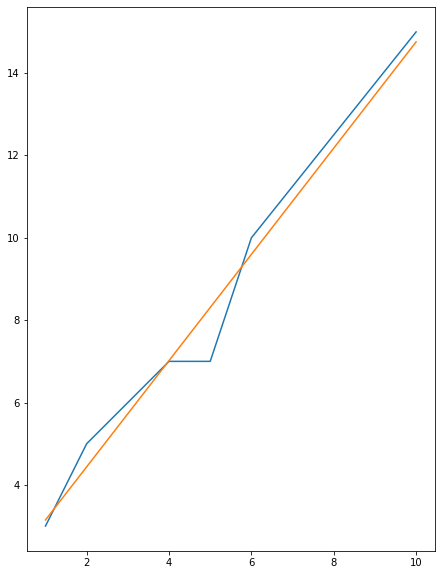

In [26]:
a, b = np.polyfit(X,Y,1)

fig, ax  = plt.subplots(1, figsize=(10, 10))
ax.set_aspect('equal')

ax.plot(X,Y)
ax.plot(X, a*X + b);

In [20]:
X

(1, 2, 3, 4, 5, 6, 10)

---

## exo 7 


Calculer le polynôme caractéristique d’une matrice de taille n en utilisant
l’interpolation du déterminant.

In [2]:
import numpy as np

In [33]:
n = 2
A = np.ones((2,2))
A[0,0] = 2
A[1,1] = 0
A

array([[2., 1.],
       [1., 0.]])

In [55]:
def char_poly(A):
    n = A.shape[0]
    T  = np.linspace(0,1,n+1)
    Y = [ np.linalg.det( t*np.identity(n) - A) for t in T ]
    return np.polyfit(T, Y, deg=n)

char_poly(A)

array([ 1.        , -0.79267538, -1.59270732, -1.18212572, -0.26570032,
        0.00555723])

In [54]:
n = 5
A = np.random.random((n,n))
char_poly(A)

array([ 1.        , -0.79267538, -1.59270732, -1.18212572, -0.26570032,
        0.00555723])